In [27]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
%matplotlib inline

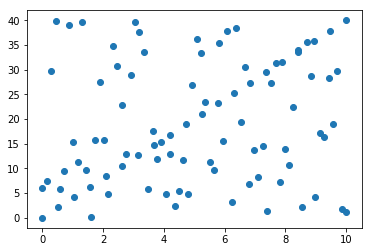

In [56]:
x = np.linspace(0,10,20)
noise = 40*np.random.rand(70)
y1 = x*4
x = np.append(x,np.linspace(0,10,70))
y1 = np.append(y1,noise)
plt.scatter(x,y1)
plt.show()

In [5]:
data = list(zip(x,y1))
datalabels = np.arange(len(data))
choices = np.random.choice(datalabels,30)
vals = []
for elem in choices:
    vals.append(data[elem])

In [172]:
A = [1,2,3,4,5]
B = [1,4]
for a in A:
    if a not in B:
        print(a)

2
3
5


In [60]:
datalabels = np.arange(10)
labels = np.random.choice(datalabels,2)
data = [x,y1]
data[0]

array([  0.        ,   0.52631579,   1.05263158,   1.57894737,
         2.10526316,   2.63157895,   3.15789474,   3.68421053,
         4.21052632,   4.73684211,   5.26315789,   5.78947368,
         6.31578947,   6.84210526,   7.36842105,   7.89473684,
         8.42105263,   8.94736842,   9.47368421,  10.        ,
         0.        ,   0.14492754,   0.28985507,   0.43478261,
         0.57971014,   0.72463768,   0.86956522,   1.01449275,
         1.15942029,   1.30434783,   1.44927536,   1.5942029 ,
         1.73913043,   1.88405797,   2.02898551,   2.17391304,
         2.31884058,   2.46376812,   2.60869565,   2.75362319,
         2.89855072,   3.04347826,   3.1884058 ,   3.33333333,
         3.47826087,   3.62318841,   3.76811594,   3.91304348,
         4.05797101,   4.20289855,   4.34782609,   4.49275362,
         4.63768116,   4.7826087 ,   4.92753623,   5.07246377,
         5.2173913 ,   5.36231884,   5.50724638,   5.65217391,
         5.79710145,   5.94202899,   6.08695652,   6.23

In [189]:
def RANSAC(data,model,n,k,t,d):
    
    x = data[0]
    y = data[1]
    size_Of_Data = len(x)
    
    iterations = 0 
    bestfit = None 
    besterr = 10000000
    datalabels = np.arange(size_Of_Data)
    while iterations < k:
        labels =[]
        labels = np.random.choice(datalabels,n)
        maybe_InliersX = []
        maybe_InliersY = []
        init_vals=[0,0]
        for label in labels:
            maybe_InliersX.append(x[label])
            maybe_InliersY.append(y[label])
        maybe_Model,_= curve_fit(model,maybe_InliersX,maybe_InliersY,p0=init_vals)
        also_InliersX = []
        also_InliersY = []
        for i,xp in enumerate(x):
            if xp not in maybe_InliersX:
                yp = y[i]
                if abs(yp-model(xp,*maybe_Model))<t:
                    also_InliersX.append(xp)
                    also_InliersY.append(yp)
        if len(also_InliersX)>d:
            for i in range(len(maybe_InliersX)):
                also_InliersX.append(maybe_InliersX[i])
                also_InliersY.append(maybe_InliersY[i])
                
            bettermodel,_= curve_fit(model,also_InliersX,also_InliersY,p0=init_vals)
            this_Error = err(also_InliersX,also_InliersY,bettermodel,model=model)
            if this_Error<besterr:
                bestfit =bettermodel
                besterr=this_Error
                print(besterr)
        iterations+=1
    return bestfit
def linear_model(x,m,b):
    return(m*x+b)

def quadratic_model(x,a,b,c,d,e,f):
    return(a+ b*x+c*x+d*x**2+e*x**3+f*x**4 )

def err(x,y,params,model= linear_model):
    tot =0
    for i in range(len(x)):
        tot+= (y[i]-linear_model(x[i],*params))**2
    return tot
    

    



In [205]:
params = RANSAC([x,y1],linear_model,2,20,2,10)

7.78843125346


c:\users\qcandles\appdata\local\programs\python\python35\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [185]:
params

array([ 4.02733835, -0.08689318])

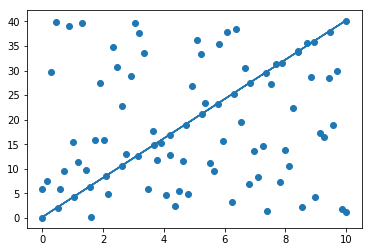

In [206]:
plt.scatter(x,y1)
y2 = []
y3 =[]
for elem in x:
    y2.append(linear_model(elem,*params))
plt.plot(x,y2)
for 
plt.show()

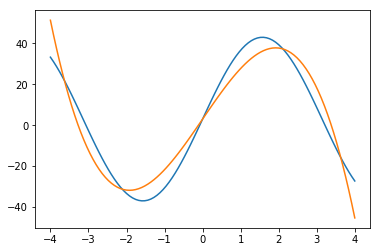

[  2.99999732e+00   3.83808634e+01  -1.11907579e+01   1.67175184e-06
  -2.45462579e+00  -1.19017222e-07]


In [97]:
from scipy.optimize import curve_fit 
x = np.linspace(-4,4,101)
y = 40*np.sin(x)+3
quadratic_init_vals = [0,0,0,0,0,0]
best_vals,covar = curve_fit(quadratic_model,x,y,p0=quadratic_init_vals)
best_vals
y2 = [] 
for elem in x:
    y2.append(quadratic_model(elem,best_vals[0],best_vals[1],best_vals[2],best_vals[3],best_vals[4],best_vals[5]))
plt.plot(x,y)
plt.plot(x,y2)
plt.show()
print(best_vals)

In [45]:
?np.random.choice

In [89]:
covar

array([[  7.65404371e-04,  -5.85354170e-04,  -1.94693871e-02],
       [ -5.85354170e-04,   2.21544209e-01,   1.48895134e-02],
       [ -1.94693871e-02,   1.48895134e-02,   8.01252007e+00]])